## PROJECT 5

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Heather's scraper 
# Setup key and base url
key = 'QMIyiDB7A8l7TmlMOHTa7di7nkXQhXgpwTM9VjsS' # my API key
url_base = 'https://api.data.gov/ed/collegescorecard/v1/schools'

# Make function that will build a url given field and criteria names
def make_url(fields, criteria, page=0, per_page=20):
    crit = '&'.join(criteria) if len(criteria)>0 else ''
    fiel = ','.join(fields)
    url = url_base+'?api_key='+key+'&fields='+fiel+'&'+crit
    url += '&_page='+str(page)
    url += '&_per_page='+str(per_page)
    return url

# define the fields and critera that will go into the url request
fields = ['school.name', 
          'school.ownership', 
          'school.state_fips',
          'school.region_id',
          'school.tuition_revenue_per_fte',
          'school.instructional_expenditure_per_fte',
          'school.faculty_salary',
          'school.ft_faculty_rate',
          '2015.earnings.10_yrs_after_entry.not_working_not_enrolled.overall', 
          '2015.completion.completion_rate_4yr_150nt',
          '2015.admissions.admission_rate.overall',
          '2015.admissions.sat_scores.average.overall',
          '2015.admissions.act_scores.midpoint.cumulative',
          '2015.aid.pell_grant_rate',
          '2015.aid.federal_loan_rate',
          '2015.aid.median_debt.completers.overall',
          '2015.student.size',
          '2015.cost.attendance.academic_year',
          '2015.student.FAFSA_applications',
          '2015.student.parents_education_level',
          '2015.student.family_income.overall']
criteria = ['school.main_campus=1',
            'school.degrees_awarded.predominant=3',
            'school.operating=1',
            'school.online_only=0',
            'school.institutional_characteristics.level=1']

# Now get the data one page at a time
more = True
page = 0
per_page = 100
data = []

while more:
    print('Page ', page)
    url = make_url(fields, criteria, page, per_page)
    page += 1
    result = requests.get(url)
    # If the request was unsuccessful break out of the loop
    if not result.ok:
        more = False
        break
    results = result.json()
    new_data = results['results']
    data += new_data  # This is where I build up the data
    meta = results['metadata']
    print(meta)
    if len(results)==0:
        print(result)
        more = False

Page  0
{'total': 1813, 'page': 0, 'per_page': 100}
Page  1
{'total': 1813, 'page': 1, 'per_page': 100}
Page  2
{'total': 1813, 'page': 2, 'per_page': 100}
Page  3
{'total': 1813, 'page': 3, 'per_page': 100}
Page  4
{'total': 1813, 'page': 4, 'per_page': 100}
Page  5
{'total': 1813, 'page': 5, 'per_page': 100}
Page  6
{'total': 1813, 'page': 6, 'per_page': 100}
Page  7
{'total': 1813, 'page': 7, 'per_page': 100}
Page  8
{'total': 1813, 'page': 8, 'per_page': 100}
Page  9
{'total': 1813, 'page': 9, 'per_page': 100}
Page  10
{'total': 1813, 'page': 10, 'per_page': 100}
Page  11
{'total': 1813, 'page': 11, 'per_page': 100}
Page  12
{'total': 1813, 'page': 12, 'per_page': 100}
Page  13
{'total': 1813, 'page': 13, 'per_page': 100}
Page  14
{'total': 1813, 'page': 14, 'per_page': 100}
Page  15
{'total': 1813, 'page': 15, 'per_page': 100}
Page  16
{'total': 1813, 'page': 16, 'per_page': 100}
Page  17
{'total': 1813, 'page': 17, 'per_page': 100}
Page  18
{'total': 1813, 'page': 18, 'per_page':

In [3]:
# Create dataframe from API data
df_api = pd.DataFrame(data)

In [4]:
df_api.columns

Index(['2015.admissions.act_scores.midpoint.cumulative',
       '2015.admissions.admission_rate.overall',
       '2015.admissions.sat_scores.average.overall',
       '2015.aid.federal_loan_rate', '2015.aid.median_debt.completers.overall',
       '2015.aid.pell_grant_rate', '2015.completion.completion_rate_4yr_150nt',
       '2015.cost.attendance.academic_year',
       '2015.earnings.10_yrs_after_entry.not_working_not_enrolled.overall',
       '2015.student.FAFSA_applications', '2015.student.family_income.overall',
       '2015.student.parents_education_level', '2015.student.size',
       'school.faculty_salary', 'school.ft_faculty_rate',
       'school.instructional_expenditure_per_fte', 'school.name',
       'school.ownership', 'school.region_id', 'school.state_fips',
       'school.tuition_revenue_per_fte'],
      dtype='object')

In [5]:
# Cache data to csv file to not have to ping the API
df_api.to_csv('P5_college_data.csv', index=False)

In [6]:
df = pd.read_csv('P5_college_data.csv')

In [7]:
# My data dictionary 
# """

# 2015.aid.median_debt.completers.overall: The median debt for students who have completed

# 2015.aid.federal_loan_rate: Percent of all undergraduate students receiving a federal student loan

# 2015.completion.completion_rate_4yr_150nt: The proportion of full-time, first-time, degree/certificate-seeking 
#     undergraduates who completed a degree or certificate at the institution within 150 percent of normal time, 
#     calculated from the IPEDS Graduation Rates component. Separate metrics are calculated for 4-year institutions 
#     and less-than-4-year institutions. This metric is calculated as the number of full-time, first-time, 
#     degree/certificate-seeking undergraduates who completed a degree or certificate divided by the number of full-time, 
#     first-time, degree/certificate-seeking undergraduates in the corresponding completion rate cohort (D150_4, D150_L4). 
#     For full-time, first-time, bachelor's degree-seeking undergraduates, 150 percent of normal time is typically 6 years, 
#     and for full-time, first-time, associate's degree-seeking undergraduates it is typically 3 years. For full-time, 
#     first-time, certificate-seeking undergraduates, the normal time period varies by the length of the program 
#     (for example, 9 months for a certificate with a normal completion time of 6 months). Proportions are expressed as 
#     decimals rounded to four decimal places, so, for example, 0.1234 equals 12.34 percent. Pooled figures include two 
#     cohorts of students.

# school.faculty_salary: Average faculty salary per month

# school.ft_faculty_rate: Proportion of faculty that is full-time

# school.instructional_expenditure_per_fte: Instructional expenditures per full-time equivalent student

# school.ownership: 
# 1 = Public
# 2 = Private nonprofit 
# 3 = Private for-profit

# school.region_id: 
# 0	U.S. Service Schools
# 1	New England (CT, ME, MA, NH, RI, VT)
# 2	Mid East (DE, DC, MD, NJ, NY, PA)
# 3	Great Lakes (IL, IN, MI, OH, WI)
# 4	Plains (IA, KS, MN, MO, NE, ND, SD)
# 5	Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)
# 6	Southwest (AZ, NM, OK, TX)
# 7	Rocky Mountains (CO, ID, MT, UT, WY)
# 8	Far West (AK, CA, HI, NV, OR, WA)
# 9	Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)

# school.state_fips: 
# 1	Alabama
# 2	Alaska
# 4	Arizona
# 5	Arkansas
# 6	California
# 8	Colorado
# 9	Connecticut
# 10	Delaware
# 11	District of Columbia
# 12	Florida
# 13	Georgia
# 15	Hawaii
# 16	Idaho
# 17	Illinois
# 18	Indiana
# 19	Iowa
# 20	Kansas
# 21	Kentucky
# 22	Louisiana
# 23	Maine
# 24	Maryland
# 25	Massachusetts
# 26	Michigan
# 27	Minnesota
# 28	Mississippi
# 29	Missouri
# 30	Montana
# 31	Nebraska
# 32	Nevada
# 33	New Hampshire
# 34	New Jersey
# 35	New Mexico
# 36	New York
# 37	North Carolina
# 38	North Dakota
# 39	Ohio
# 40	Oklahoma
# 41	Oregon
# 42	Pennsylvania
# 44	Rhode Island
# 45	South Carolina
# 46	South Dakota
# 47	Tennessee
# 48	Texas
# 49	Utah
# 50	Vermont
# 51	Virginia
# 53	Washington
# 54	West Virginia
# 55	Wisconsin
# 56	Wyoming
# 60	American Samoa
# 64	Federated States of Micronesia
# 66	Guam
# 69	Northern Mariana Islands
# 70	Palau
# 72	Puerto Rico
# 78	Virgin Islands

# school.tuition_revenue_per_fte: Net tuition revenue per full-time equivalent student

# """

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 21 columns):
2015.admissions.act_scores.midpoint.cumulative                       1150 non-null float64
2015.admissions.admission_rate.overall                               1552 non-null float64
2015.admissions.sat_scores.average.overall                           1185 non-null float64
2015.aid.federal_loan_rate                                           1811 non-null float64
2015.aid.median_debt.completers.overall                              1660 non-null float64
2015.aid.pell_grant_rate                                             1811 non-null float64
2015.completion.completion_rate_4yr_150nt                            1713 non-null float64
2015.cost.attendance.academic_year                                   1713 non-null float64
2015.earnings.10_yrs_after_entry.not_working_not_enrolled.overall    0 non-null float64
2015.student.FAFSA_applications                                      1791 non

In [9]:
# drop empty column 
df.drop(['2015.earnings.10_yrs_after_entry.not_working_not_enrolled.overall'], axis=1, inplace=True)

In [10]:
df.columns

Index(['2015.admissions.act_scores.midpoint.cumulative',
       '2015.admissions.admission_rate.overall',
       '2015.admissions.sat_scores.average.overall',
       '2015.aid.federal_loan_rate', '2015.aid.median_debt.completers.overall',
       '2015.aid.pell_grant_rate', '2015.completion.completion_rate_4yr_150nt',
       '2015.cost.attendance.academic_year', '2015.student.FAFSA_applications',
       '2015.student.family_income.overall',
       '2015.student.parents_education_level', '2015.student.size',
       'school.faculty_salary', 'school.ft_faculty_rate',
       'school.instructional_expenditure_per_fte', 'school.name',
       'school.ownership', 'school.region_id', 'school.state_fips',
       'school.tuition_revenue_per_fte'],
      dtype='object')

In [11]:
df.columns = ['ACT_scores', 'Admission_rate', 'SAT_scores', 'Federal_loan_rate', 'Median_debt', 
              'Pell_grant_rate', 'Completion_rate', 'Cost_attendance_year', 'FAFSA_applictions', 
              'Family_income', 'Parents_education_level', 'Student_size', 'Faculty_salary_month', 
              'Faculty_fulltime_pct', 'Instructional_expenditure_per_fte', 'School_name', 
              'School_ownership_id', 'School_region_id', 'School_state_id', 'Tuition_revenue_per_fte']

In [12]:
df.head(2)

,ACT_scores,Admission_rate,SAT_scores,Federal_loan_rate,Median_debt,Pell_grant_rate,Completion_rate,Cost_attendance_year,FAFSA_applictions,Family_income,Parents_education_level,Student_size,Faculty_salary_month,Faculty_fulltime_pct,Instructional_expenditure_per_fte,School_name,School_ownership_id,School_region_id,School_state_id,Tuition_revenue_per_fte
0,26.0,0.4464,1177.0,0.4611,19147.5,0.4070,0.6844,19578.0,14726.0,14726.0,13502.0,30282.0,9382.0,0.7669,9275,University of South Florida-Main Campus,1,5,12,6669
1,NaN,1.0000,NaN,0.5682,25000.0,0.5825,1.0000,10776.0,212.0,212.0,179.0,409.0,5449.0,0.4722,2554,Luther Rice College & Seminary,2,5,13,6595


In [13]:
df.describe(include='all')
# school_name is only object

,ACT_scores,Admission_rate,SAT_scores,Federal_loan_rate,Median_debt,Pell_grant_rate,Completion_rate,Cost_attendance_year,FAFSA_applictions,Family_income,Parents_education_level,Student_size,Faculty_salary_month,Faculty_fulltime_pct,Instructional_expenditure_per_fte,School_name,School_ownership_id,School_region_id,School_state_id,Tuition_revenue_per_fte
count,1150.000000,1552.000000,1185.000000,1811.000000,1660.000000,1811.000000,1713.000000,1713.000000,1791.000000,1791.000000,1611.000000,1810.000000,1796.000000,1729.000000,1813.000000,1813,1813.000000,1813.000000,1813.000000,1813.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1798,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lincoln University,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
mean,23.348696,0.658089,1063.589873,0.555146,23507.293373,0.388353,0.529154,33233.035026,2278.128978,2278.128978,2253.229050,4746.696133,7269.530067,0.673835,10967.076669,NaN,1.737452,4.216768,30.167678,13351.258687
std,3.538323,0.201677,137.101716,0.217391,5673.174046,0.176789,0.201815,14326.198547,4511.185300,4511.185300,3982.441825,7649.502961,2487.297691,0.259725,10504.101711,NaN,0.519502,2.183347,15.841256,8087.985881
min,14.000000,0.000000,708.000000,0.000000,1700.000000,0.000000,0.000000,6748.000000,10.000000,10.000000,16.000000,3.000000,361.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000,6.000000
25%,21.000000,0.531700,976.000000,0.438650,20750.000000,0.263450,0.391300,20950.000000,465.000000,465.000000,550.000000,833.000000,5797.250000,0.483100,6377.000000,NaN,1.000000,2.000000,17.000000,7547.000000
50%,23.000000,0.678750,1045.000000,0.591000,24727.500000,0.368900,0.523800,31200.000000,958.000000,958.000000,1007.000000,1874.500000,7083.000000,0.684200,8571.000000,NaN,2.000000,4.000000,31.000000,12131.000000
75%,25.000000,0.796250,1126.000000,0.710850,27000.000000,0.485650,0.670100,43749.000000,2375.000000,2375.000000,2470.000000,5159.000000,8579.250000,0.930800,11744.000000,NaN,2.000000,5.000000,42.000000,17172.000000


In [14]:
# set school name as index? 
df.sort_values('School_name')

,ACT_scores,Admission_rate,SAT_scores,Federal_loan_rate,Median_debt,Pell_grant_rate,Completion_rate,Cost_attendance_year,FAFSA_applictions,Family_income,Parents_education_level,Student_size,Faculty_salary_month,Faculty_fulltime_pct,Instructional_expenditure_per_fte,School_name,School_ownership_id,School_region_id,School_state_id,Tuition_revenue_per_fte
1330,NaN,NaN,NaN,0.6486,30844.0,0.5263,0.3459,29249.0,1560.0,1560.0,1343.0,2412.0,4845.0,0.3415,5154,AI Miami International University of Art and D...,3,5,12,14548
411,25.0,0.4992,1092.0,0.5164,25325.0,0.2630,0.6088,42942.0,1463.0,1463.0,1388.0,3695.0,7739.0,0.8213,9390,Abilene Christian University,2,6,48,14197
647,NaN,NaN,NaN,0.5139,35000.0,0.3861,0.3724,36786.0,4446.0,4446.0,3875.0,8969.0,7682.0,0.2054,12754,Academy of Art University,3,8,6,25936
677,20.0,0.6435,954.0,0.6062,21291.5,0.5051,0.2698,20143.0,1147.0,1147.0,1044.0,2067.0,5999.0,0.4754,9246,Adams State University,1,7,8,6691
1409,22.0,0.7219,1094.0,0.5971,25500.0,0.3147,0.6701,45034.0,2026.0,2026.0,1822.0,4813.0,12033.0,0.3207,12871,Adelphi University,2,2,36,22428
1496,22.0,0.6103,1008.0,0.8783,27000.0,0.4145,0.5355,44646.0,1010.0,1010.0,965.0,1622.0,7789.0,0.5000,8868,Adrian College,2,3,26,14889
327,20.0,0.6032,928.0,0.6026,23500.0,0.3769,0.1571,22019.0,812.0,812.0,731.0,1704.0,7013.0,0.9804,9683,Adventist University of Health Sciences,2,5,12,13741
1379,NaN,0.6174,NaN,0.6392,27000.0,0.4273,0.6765,48109.0,398.0,398.0,370.0,846.0,9013.0,0.6718,16136,Agnes Scott College,2,5,13,12372
50,18.0,0.6538,850.0,0.8159,35000.0,0.7249,0.3081,20809.0,2847.0,2847.0,2539.0,4505.0,7017.0,0.7096,7941,Alabama A & M University,1,5,1,9657
394,18.0,0.4639,844.0,0.7692,32091.0,0.7567,0.2696,18100.0,2489.0,2489.0,2199.0,4740.0,7940.0,0.6395,7742,Alabama State University,1,5,1,7717


In [15]:
df_schools = df.set_index('School_name')

In [16]:
df_schools

,ACT_scores,Admission_rate,SAT_scores,Federal_loan_rate,Median_debt,Pell_grant_rate,Completion_rate,Cost_attendance_year,FAFSA_applictions,Family_income,Parents_education_level,Student_size,Faculty_salary_month,Faculty_fulltime_pct,Instructional_expenditure_per_fte,School_ownership_id,School_region_id,School_state_id,Tuition_revenue_per_fte
School_name,,,,,,,,,,,,,,,,,,,
University of South Florida-Main Campus,26.0,0.4464,1177.0,0.4611,19147.5,0.4070,0.6844,19578.0,14726.0,14726.0,13502.0,30282.0,9382.0,0.7669,9275,1,5,12,6669
Luther Rice College & Seminary,NaN,1.0000,NaN,0.5682,25000.0,0.5825,1.0000,10776.0,212.0,212.0,179.0,409.0,5449.0,0.4722,2554,2,5,13,6595
Embry-Riddle Aeronautical University-Daytona Beach,NaN,0.6895,NaN,0.5263,25000.0,0.2972,0.5545,47582.0,5919.0,5919.0,5448.0,5247.0,9099.0,0.8786,16076,2,5,12,28796
Yeshiva Ohr Elchonon Chabad West Coast Talmudical Seminary,NaN,0.5842,NaN,0.0000,NaN,0.6687,0.1837,24850.0,94.0,94.0,NaN,161.0,2719.0,NaN,10505,2,8,6,12391
Strayer University-District of Columbia,NaN,NaN,NaN,0.6888,34891.0,0.5175,0.2000,29544.0,28672.0,28672.0,23190.0,809.0,8775.0,0.1094,2383,3,2,11,16427
Central Connecticut State University,22.0,0.5867,1011.0,0.5742,22500.0,0.3533,0.5732,22229.0,4209.0,4209.0,3798.0,9693.0,9118.0,0.4840,10814,1,1,9,7684
Delaware State University,19.0,0.4443,892.0,0.6523,28500.0,0.4715,0.4195,21182.0,2106.0,2106.0,1867.0,3686.0,7202.0,0.6443,10992,1,2,10,5647
Georgia State University,23.0,0.5665,1056.0,0.5816,23699.0,0.5268,0.5390,23631.0,17238.0,17238.0,15101.0,24421.0,8580.0,0.7576,7646,1,5,13,7355
Brigham Young University-Idaho,23.0,0.9959,1040.0,0.2646,11000.0,0.3968,0.6113,11676.0,10322.0,10322.0,9936.0,28457.0,8444.0,0.2955,4327,2,7,16,2611


In [17]:
# ACT_scores vs cost_attendance_year

In [18]:
y = df_schools.Cost_attendance_year
x = df_schools.ACT_scores

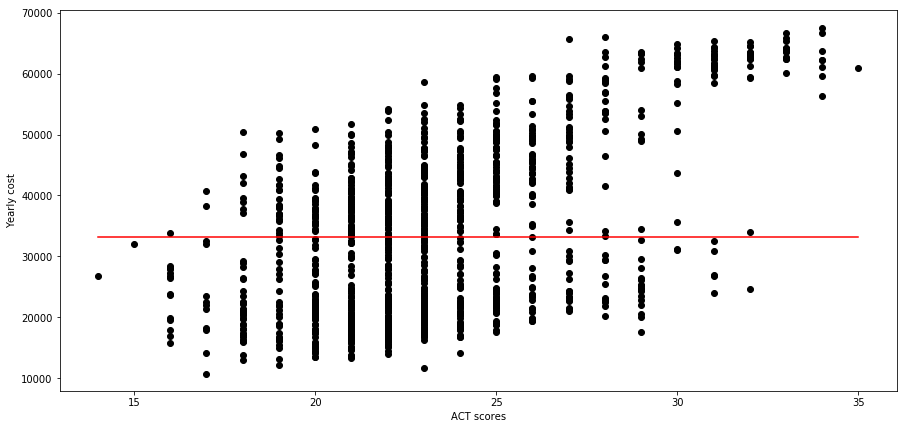

In [19]:
### Plot the data
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()
plt.xlabel('ACT scores')
plt.ylabel('Yearly cost')
# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot((df_schools['ACT_scores'].min(), df['ACT_scores'].max()),
        (np.mean(df['Cost_attendance_year']), np.mean(df['Cost_attendance_year'])), color='r');

In [20]:
# SAT_scores vs cost_attendance_year

In [21]:
y = df_schools.Cost_attendance_year
x = df_schools.SAT_scores

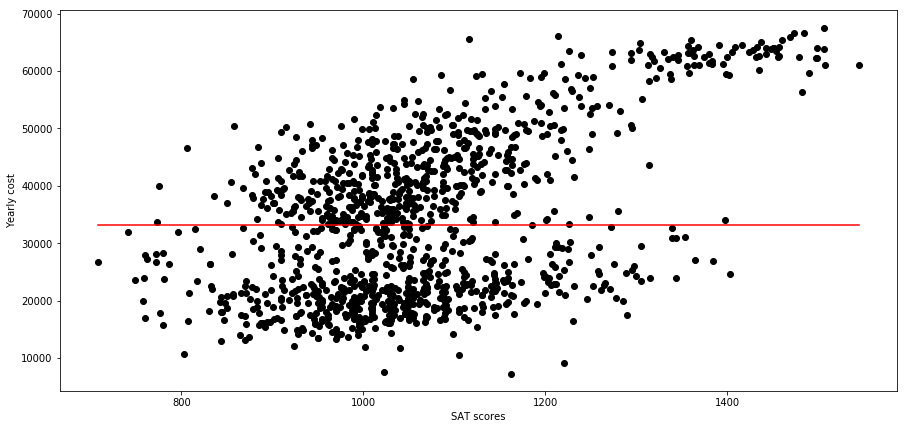

In [22]:
### Plot the data
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()
plt.xlabel('SAT scores')
plt.ylabel('Yearly cost')
# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot((df_schools['SAT_scores'].min(), df['SAT_scores'].max()),
        (np.mean(df['Cost_attendance_year']), np.mean(df['Cost_attendance_year'])), color='r');

In [23]:
# School_region_id vs cost_attendance_year

In [24]:
y = df_schools.Cost_attendance_year
x = df_schools.School_region_id

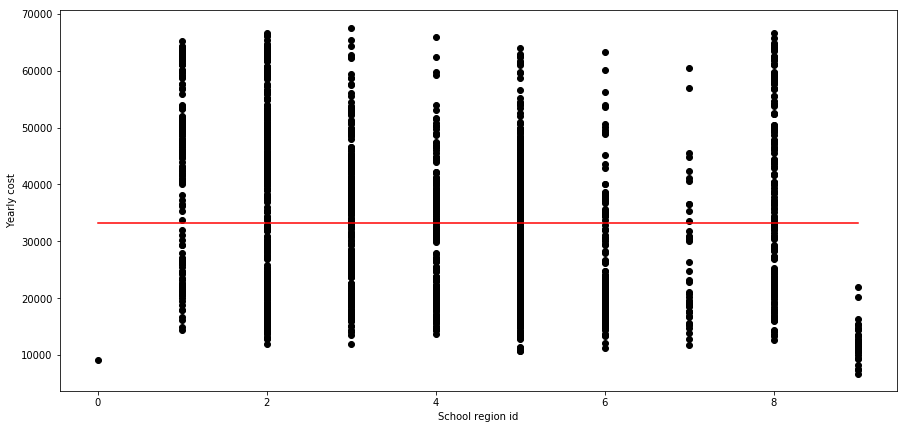

In [25]:
### Plot the data
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()
plt.xlabel('School region id')
plt.ylabel('Yearly cost')
# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot((df_schools['School_region_id'].min(), df['School_region_id'].max()),
        (np.mean(df['Cost_attendance_year']), np.mean(df['Cost_attendance_year'])), color='r');

In [26]:
# School_state_id vs cost_attendance_year

In [27]:
y = df_schools.Cost_attendance_year
x = df_schools.School_state_id

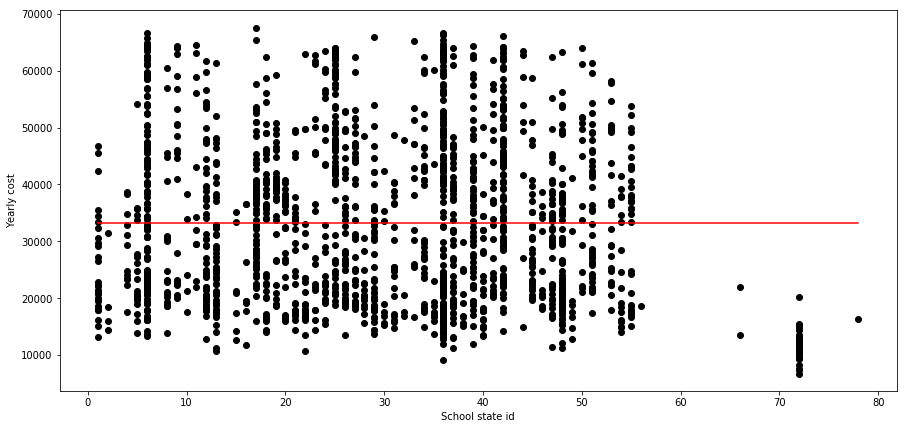

In [28]:
### Plot the data
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()
plt.xlabel('School state id')
plt.ylabel('Yearly cost')
# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot((df_schools['School_state_id'].min(), df['School_state_id'].max()),
        (np.mean(df['Cost_attendance_year']), np.mean(df['Cost_attendance_year'])), color='r');

In [26]:
# School_ownership_id vs cost_attendance_year

In [81]:
y = df_schools.Cost_attendance_year
x = df_schools.School_ownership_id

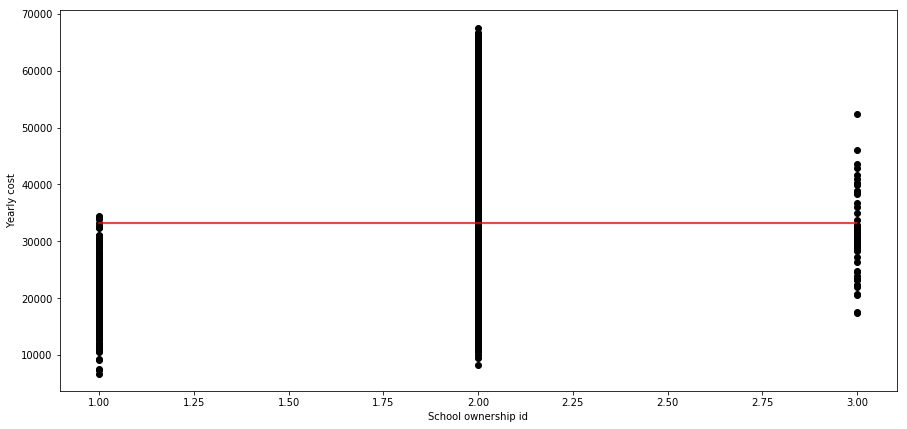

In [84]:
### Plot the data
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()
plt.xlabel('School ownership id')
plt.ylabel('Yearly cost')
# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot((df_schools['School_ownership_id'].min(), df['School_ownership_id'].max()),
        (np.mean(df['Cost_attendance_year']), np.mean(df['Cost_attendance_year'])), color='r');

In [29]:
# set up date for MLR

In [30]:
df_schools.head(1)

,ACT_scores,Admission_rate,SAT_scores,Federal_loan_rate,Median_debt,Pell_grant_rate,Completion_rate,Cost_attendance_year,FAFSA_applictions,Family_income,Parents_education_level,Student_size,Faculty_salary_month,Faculty_fulltime_pct,Instructional_expenditure_per_fte,School_ownership_id,School_region_id,School_state_id,Tuition_revenue_per_fte
School_name,,,,,,,,,,,,,,,,,,,
University of South Florida-Main Campus,26.0,0.4464,1177.0,0.4611,19147.5,0.407,0.6844,19578.0,14726.0,14726.0,13502.0,30282.0,9382.0,0.7669,9275,1,5,12,6669


In [31]:
df_MLR = df_schools[['ACT_scores', 'SAT_scores', 'Student_size', 'School_region_id', 'School_state_id', 
                     'School_ownership_id', 'Cost_attendance_year']]

In [32]:
df_MLR.head()

,ACT_scores,SAT_scores,Student_size,School_region_id,School_state_id,School_ownership_id,Cost_attendance_year
School_name,,,,,,,
University of South Florida-Main Campus,26.0,1177.0,30282.0,5,12,1,19578.0
Luther Rice College & Seminary,NaN,NaN,409.0,5,13,2,10776.0
Embry-Riddle Aeronautical University-Daytona Beach,NaN,NaN,5247.0,5,12,2,47582.0
Yeshiva Ohr Elchonon Chabad West Coast Talmudical Seminary,NaN,NaN,161.0,8,6,2,24850.0
Strayer University-District of Columbia,NaN,NaN,809.0,2,11,3,29544.0


In [33]:
df_MLR.dropna(subset=['ACT_scores', 'SAT_scores', 'Cost_attendance_year'], inplace=True)

C:\Users\CHIWLONG\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
df_MLR

,ACT_scores,SAT_scores,Student_size,School_region_id,School_state_id,School_ownership_id,Cost_attendance_year
School_name,,,,,,,
University of South Florida-Main Campus,26.0,1177.0,30282.0,5,12,1,19578.0
Central Connecticut State University,22.0,1011.0,9693.0,1,9,1,22229.0
Delaware State University,19.0,892.0,3686.0,2,10,1,21182.0
Georgia State University,23.0,1056.0,24421.0,5,13,1,23631.0
Brigham Young University-Idaho,23.0,1040.0,28457.0,7,16,2,11676.0
University of Illinois at Urbana-Champaign,29.0,1305.0,32170.0,3,17,1,29568.0
Chicago State University,18.0,875.0,3437.0,3,17,1,20305.0
Illinois Institute of Technology,28.0,1251.0,2923.0,3,17,2,53585.0
University of Colorado Boulder,27.0,1212.0,26496.0,7,8,1,30025.0


In [90]:
# design matrix == inputs only
#X = df_MLR[['ACT_scores']]
#X = df_MLR[['SAT_scores']]
#X = df_MLR[['School_region_id']]
#X = df_MLR[['School_state_id']]
#X  = df_MLR[['School_ownership_id']]
#X = df_MLR[['Student_size']]
X = df_MLR[['School_ownership_id', 'ACT_scores', 'SAT_scores']]

X['intercept'] = 1.0
# X.head()
X = X.values
X

C:\Users\CHIWLONG\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[  1.00000000e+00,   2.60000000e+01,   1.17700000e+03,
          1.00000000e+00],
       [  1.00000000e+00,   2.20000000e+01,   1.01100000e+03,
          1.00000000e+00],
       [  1.00000000e+00,   1.90000000e+01,   8.92000000e+02,
          1.00000000e+00],
       ..., 
       [  1.00000000e+00,   2.90000000e+01,   1.28500000e+03,
          1.00000000e+00],
       [  2.00000000e+00,   2.30000000e+01,   1.04100000e+03,
          1.00000000e+00],
       [  1.00000000e+00,   2.40000000e+01,   1.08100000e+03,
          1.00000000e+00]])

In [91]:
y = df_MLR.Cost_attendance_year.values
y

array([ 19578.,  22229.,  21182., ...,  20004.,  26231.,  18691.])

In [92]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)

print(linreg.coef_) 

[  1.89370742e+04   1.14037969e+03   1.75788602e+01  -4.20830336e+04]


In [93]:
# sklearn automatially adds the intercept! (beta_0)
# statsmodels does not!! 
import statsmodels.api as sm

# X = df[["RM","LSTAT"]].values
# manually add the intercept column:
# X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1) # This is adding the column of ones (intercept)
# y = target

model = sm.OLS(y, X) # Ordinary Least Squares = linear regression 
model = model.fit()
predictions = model.predict()

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1148.
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:40:07   Log-Likelihood:                -11781.
No. Observations:                1149   AIC:                         2.357e+04
Df Residuals:                    1145   BIC:                         2.359e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.894e+04    417.202     45.391      0.000    1.81e+04    1.98e+04
x2          1140.3797    387.971      2.939      0.003     379.165    1901.594
x3            17.5789      9.991      1.760      0.079      -2.023      37.181
const      -4.208e+04   2282.290    -18.439      0.000   -4.66e+04   -3.76e+04
==============================================================================
Omnibus:                      112.880   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.754
Skew:                          -0.599   Prob(JB):                     1.43e-52
Kurtosis:                       4.885   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
# ACT scores - r2 = .298, coef 2119, P 0.000, .025 = 1930, 0.975 = 2307 ### Pretty good predictor of cost

In [96]:
# SAT scores - r2 = .282, coef 53, P 0.000, .025 = 48, 0.975 = 58 ### Pretty good predictor of cost 

In [97]:
# Student size - r2 = .097, coef -.5569, P 0.000, .025 = -.655, .975 = -.459 ### Not good predictor of cost 

In [98]:
# Region ID - r2 = .031, coef -1249, P 0.000, .025 = -1654, 0.975 = -843 ### Not good predictor of cost

In [99]:
# State ID - r2 = .001, coef -34, P 0.198, .025 = -87, 0.975 = 18 ### Not good predictor of cost 

In [100]:
# School ownership ID - r2 = .534, coef 20348, P 0.000, .025 = 1.92e+04, 0.975 = 2.14e+04 ### Good predictor of cost 

In [101]:
# School ownership ID + ACT scores + SAT scores - 
# r2 = .750, coef 20348, P 0.000, .025 = 1.92e+04, 0.975 = 2.14e+04 ### Very good predictor of cost

In [102]:
lm = LinearRegression()

X = df_MLR[['School_ownership_id', 'ACT_scores', 'SAT_scores']]
y = y = df_MLR.Cost_attendance_year  

lm = lm.fit(X, y)

In [103]:
predictions = lm.predict(X)
print(predictions)

[ 27194.231137    19714.62156789  14201.59812222 ...,  32513.88712036
  40319.44131317  23225.90116971]


In [104]:
print(X.shape)
print(predictions.shape)

(1149, 3)
(1149,)


In [105]:
score = lm.score(X, y)
print(score) # R^2 of .75 - I'm good with that! 

0.750461019524


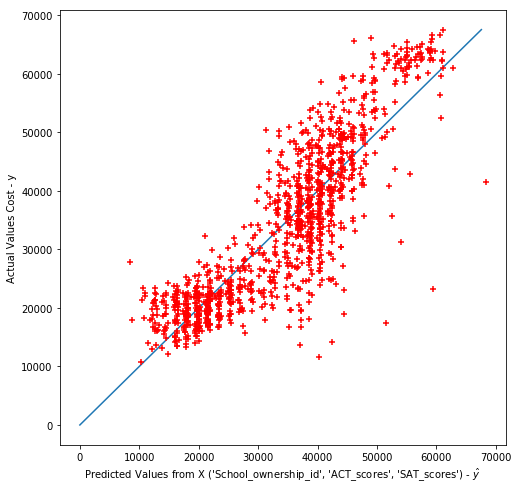

In [106]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from X ('School_ownership_id', 'ACT_scores', 'SAT_scores') - $\hat{y}$")
plt.ylabel("Actual Values Cost - y")

plt.plot([0, np.max(y)], [0, np.max(y)])

In [107]:
# need to train test split and try again...

In [108]:
from sklearn.model_selection import train_test_split


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
#lm = LinearRegression()

#X = df_MLR[['School_ownership_id', 'ACT_scores', 'SAT_scores']]
#y = y = df_MLR.Cost_attendance_year  

lm = lm.fit(X_train, y_train)

In [111]:
predictions = lm.predict(X_train)
print(predictions)

[ 21565.99449298  42605.06182284  21648.96300853  44277.44723105
  39066.69780347  56775.11160341  23376.66076044  26937.14971728
  31967.84482726  19932.32772536  12584.5692025   44426.79055903
  38756.94867875  57040.61085317  60634.28721623  17944.66195806
  35345.8030499   37001.594755    40849.70789908  42549.74947914
  40750.14568042  47865.59235974  30492.10743976  37200.71919231
  28081.01304259  42582.93688536  49737.10220527  35318.14687805
  38989.26052229  32507.4293789   38967.13558481  35879.85636717
  38933.94817859  42356.15627619  40833.11419597  23420.9106354
  18077.41158294  14627.5473135   38928.41694422  37283.68770786
  40788.86432101  21621.30683668  23465.16051035  16205.90173742
  37211.78166105  56218.93334866  21588.11943046  47931.96717218
  42455.71849485  46077.05102976  12783.69363982  37117.75067677
  23426.44186977  16250.15161238  16366.30753414  53209.09141219
  58901.05822995  19937.85895973  31918.06371793  47423.09361015
  44404.66562155  13320.22

In [112]:
print(X_train.shape)
print(predictions.shape)

(769, 3)
(769,)


In [113]:
score = lm.score(X_train, y_train)
print(score) # R^2 of .7529 - I'm good with that! 

0.752901972356


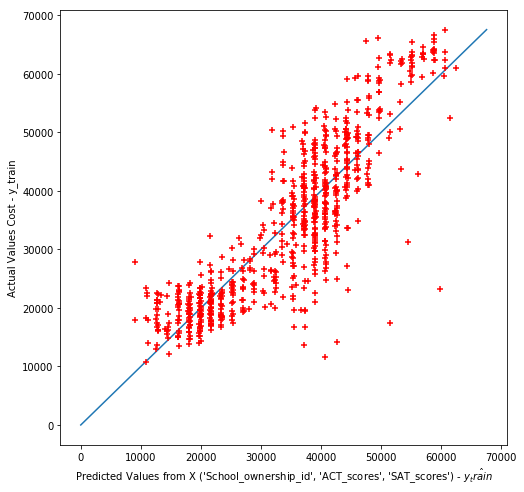

In [114]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from X ('School_ownership_id', 'ACT_scores', 'SAT_scores') - $\hat{y_train}$")
plt.ylabel("Actual Values Cost - y_train")

plt.plot([0, np.max(y_train)], [0, np.max(y_train)])

In [115]:
# now run on X_test y_test!

In [116]:
#lm = LinearRegression()

#X = df_MLR[['School_ownership_id', 'ACT_scores', 'SAT_scores']]
#y = y = df_MLR.Cost_attendance_year  

lm = lm.fit(X_test, y_test)

In [117]:
predictions = lm.predict(X_test)
print(predictions)

[ 27553.25367626  58591.42895126  35646.893079    25385.66912724
  42777.81020262  18628.35317517  31079.71947306  29673.71166358
  44538.98252953  45232.76810721  28661.693762    50680.49843396
  49042.48611658  40359.78449157  32142.98507931  20430.57883859
  39826.09111695  47445.52713571  19527.40543539  13098.5161754
  18423.08649263  34953.10750132  12031.12942616  32046.56289514
  43143.16908823  22072.71229895  18665.2853687   18464.13982914
  21165.41775277  36180.58645361  22150.69782899  37120.69205034
  20266.36549256  32740.34847281  42978.95574219  30244.33723172
  35355.39858045  21329.63109881  34214.14744416  46012.78150088
  23213.96343525  55028.03096094  39620.82443441  38105.97212656
  35934.26643456  40113.46447252  36755.33316474  36016.37310758
  39210.29106932  41874.63679943  20143.20548303  19445.29876238
  15594.52741649  37859.6521075   41464.10343434  39415.55775187
  33434.13405049  53426.95083709  23213.96343525  45438.03478975
  45684.3548088   37001.65

In [118]:
print(X_test.shape)
print(predictions.shape)

(380, 3)
(380,)


In [119]:
score = lm.score(X_test, y_test)
print(score) # R^2 of .7488 - I'm good with that! 

0.748826226599


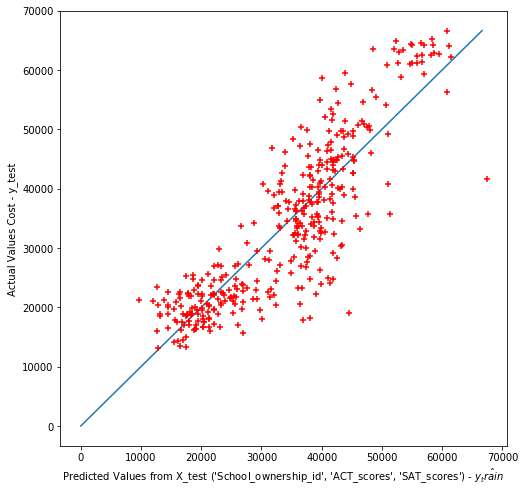

In [120]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from X_test ('School_ownership_id', 'ACT_scores', 'SAT_scores') - $\hat{y_train}$")
plt.ylabel("Actual Values Cost - y_test")

plt.plot([0, np.max(y_test)], [0, np.max(y_test)]);